In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and inspect data

In [2]:
df = pd.read_csv("data/data3a.csv")
print(len(df))
print(df.dtypes)
df.head(5)

100
y      int64
x    float64
f     object
dtype: object


,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [25]:
df.min()

y       2
x    7.19
f       C
dtype: object

In [24]:
df.max()

y      15
x    12.4
f       T
dtype: object

In [27]:
df["f"].nunique()

2

In [14]:
def hist_density_plot(ax, data, col_name, hue):
    sns.histplot(ax=ax, data=data, stat="density", x=col_name, hue=hue, multiple="stack")
    sns.kdeplot(ax=ax, data=data, x=col_name, color='k')

def box_swarm_plot(ax, data, x, y, hue):
    sns.boxplot(ax=ax, data=data, x=x, y=y, hue=hue, dodge=False)
    sns.swarmplot(ax=ax, data=data, x=x, y=y, hue=hue, size=10, edgecolors='k', linewidth=1)
    
def scatter_plot(ax, data, x, y, hue):
    sns.scatterplot(
        ax=ax, 
        data=data, x=x, y=y, 
        style=hue, hue=hue, 
        markers=['o', '^'],
        s=100,
        edgecolor='k', linewidths=10
    )

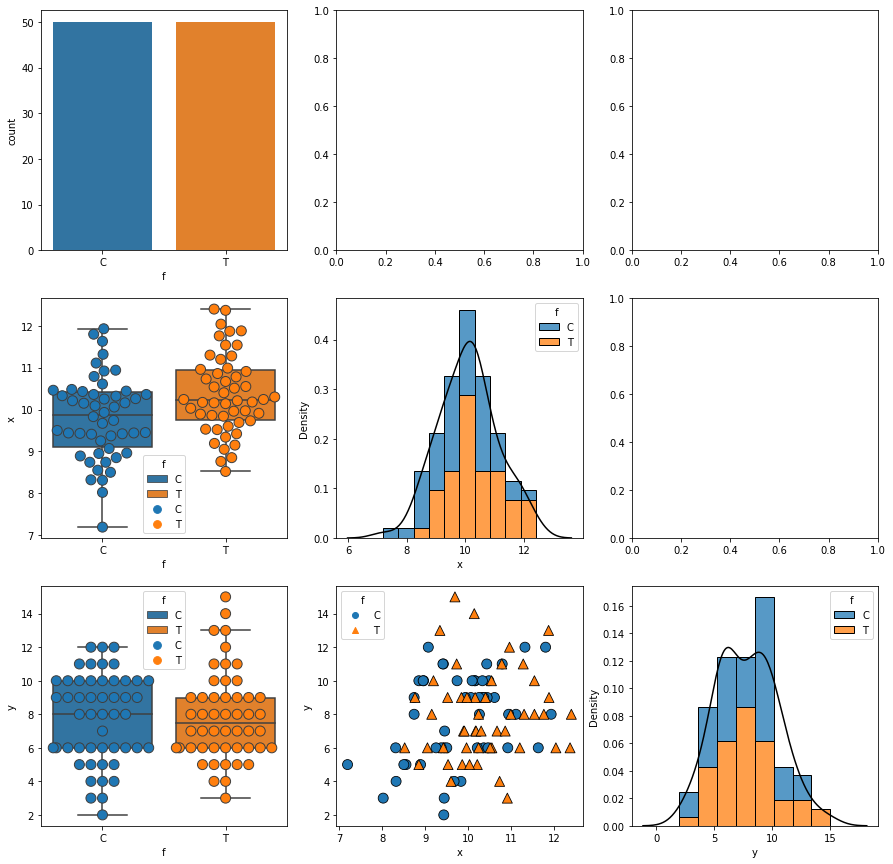

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

# f
sns.countplot(ax=axes[0, 0], data=df, x="f")

# x
box_swarm_plot(ax=axes[1, 0], data=df, x="f", y="x", hue="f")
hist_density_plot(ax=axes[1, 1], data=df, col_name="x", hue="f")

# y
box_swarm_plot(ax=axes[2, 0], data=df, x="f", y="y", hue="f")
scatter_plot(ax=axes[2, 1], data=df, x="x", y="y", hue="f")
hist_density_plot(ax=axes[2, 2], data=df, col_name="y", hue="f")

plt.show()

# Run Stan

In [29]:
model = CmdStanModel(stan_file="model/exec6.stan")
print(model)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chap05/model/exec6
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chap05/model/exec6


CmdStanModel: name=exec6
	 stan_file=/workdir/chap05/model/exec6.stan
	 exe_file=/workdir/chap05/model/exec6
	 compiler_optons=stanc_options=None, cpp_options=None


In [33]:
data = {
    "N": len(df),
    "x": df["x"].values,
    "f": [0 if fchar == 'C' else 1 for fchar in df["f"].values],
    "y": df["y"].values
}

In [35]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


# Inspect the result

In [36]:
print(fit)

CmdStanMCMC: model=exec6 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmpdbd7s6ra/exec6-202009221104-1-18i58loi.csv
	/tmp/tmpdbd7s6ra/exec6-202009221104-2-dkl6jdsg.csv
	/tmp/tmpdbd7s6ra/exec6-202009221104-3-wl7zs2ag.csv
	/tmp/tmpdbd7s6ra/exec6-202009221104-4-684mej2v.csv
 output_files:
	/tmp/tmpdbd7s6ra/exec6-202009221104-1-18i58loi-stdout.txt
	/tmp/tmpdbd7s6ra/exec6-202009221104-2-dkl6jdsg-stdout.txt
	/tmp/tmpdbd7s6ra/exec6-202009221104-3-wl7zs2ag-stdout.txt
	/tmp/tmpdbd7s6ra/exec6-202009221104-4-684mej2v-stdout.txt


In [37]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 210)


In [38]:
fit.stan_variables()

{'b': array([[ 1.55733   ,  0.0460956 ,  0.00481478],
        [ 1.60345   ,  0.0484631 ,  0.00616044],
        [ 1.57548   ,  0.0480521 ,  0.00301533],
        ...,
        [ 1.07773   ,  0.0930053 , -0.0415936 ],
        [ 1.10426   ,  0.0947346 , -0.0431816 ],
        [ 1.42967   ,  0.0616927 ,  0.0390036 ]]),
 'lambda': array([[1.94038, 1.99247, 1.99523, ..., 2.03416, 2.06274, 2.02171],
        [2.00618, 2.06094, 2.06385, ..., 2.10587, 2.13592, 2.09279],
        [1.9748 , 2.02909, 2.03198, ..., 2.07055, 2.10034, 2.05758],
        ...,
        [1.8506 , 1.9557 , 1.96128, ..., 1.98851, 2.04617, 1.9634 ],
        [1.89151, 1.99856, 2.00424, ..., 2.03117, 2.0899 , 2.00559],
        [1.94233, 2.01204, 2.01575, ..., 2.1004 , 2.13865, 2.08375]]),
 'y_pred': array([[ 8.,  6.,  5., ..., 10.,  9.,  6.],
        [12.,  6.,  3., ..., 11., 12.,  4.],
        [ 8.,  6.,  7., ..., 10.,  9.,  7.],
        ...,
        [ 3.,  9.,  9., ..., 10.,  4.,  6.],
        [ 9., 11., 11., ...,  7.,  5.,  6.],

In [39]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,829.221,0.033598,1.2238,826.812,829.534,830.552,1326.74,609.157,1.00256
b[1],1.300,0.011000,0.3700,0.650,1.300,1.900,1058.00,486.000,1.00000
b[2],0.080,0.001100,0.0370,0.020,0.079,0.140,1053.00,484.000,1.00000
b[3],-0.030,0.001900,0.0740,-0.150,-0.027,0.090,1496.00,687.000,1.00000
lambda[1],1.900,0.002100,0.0780,1.800,1.900,2.100,1352.00,621.000,1.00000
...,...,...,...,...,...,...,...,...,...
y_pred[96],7.200,0.045000,2.7000,3.000,7.000,12.000,3655.00,1678.000,1.00000
y_pred[97],6.800,0.044000,2.6000,3.000,7.000,11.000,3673.00,1687.000,1.00000
y_pred[98],7.800,0.049000,2.8000,3.000,8.000,13.000,3438.00,1579.000,1.00000


In [40]:
# Check the convergence
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [41]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmpdbd7s6ra/exec6-202009221104-1-18i58loi.csv, /tmp/tmpdbd7s6ra/exec6-202009221104-2-dkl6jdsg.csv, /tmp/tmpdbd7s6ra/exec6-202009221104-3-wl7zs2ag.csv, /tmp/tmpdbd7s6ra/exec6-202009221104-4-684mej2v.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmpdbd7s6ra/exec6-202009221104-1-18i58loi.csv, /tmp/tmpdbd7s6ra/exec6-202009221104-2-dkl6jdsg.csv, /tmp/tmpdbd7s6ra/exec6-202009221104-3-wl7zs2ag.csv, /tmp/tmpdbd7s6ra/exec6-202009221104-4-684mej2v.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Plot the result

In [42]:
y_pred_percentiles = np.percentile(fit.stan_variable("y_pred"), [10.0, 50.0, 90.0], axis=0)

Text(0, 0.5, 'predicted')

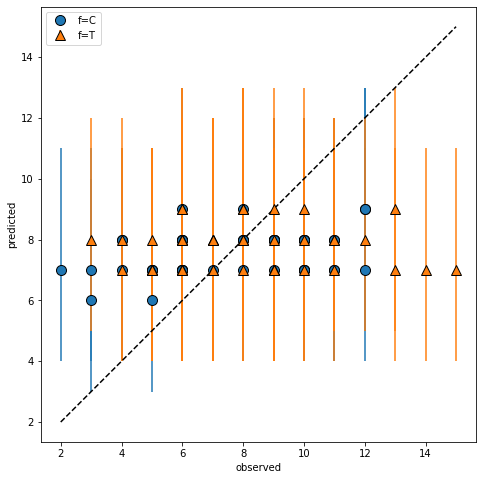

In [45]:
# observation vs. prediction

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

idx0 = np.where(df["f"].values == "C")[0]
idx1 = np.where(df["f"].values == "T")[0]

ax.errorbar(
    x=df["y"].values[idx0], 
    y=y_pred_percentiles[1][idx0], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx0] - y_pred_percentiles[1][idx0]),
    fmt='o',
    markersize=10,
    markeredgecolor='k',
    label="f=C"
)

ax.errorbar(
    x=df["y"].values[idx1], 
    y=y_pred_percentiles[1][idx1], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx1] - y_pred_percentiles[1][idx1]),
    fmt='^',
    markersize=10,
    markeredgecolor='k',
    label="f=T"
)

ax.legend()
ax.plot([2.0, 15.0], [2.0, 15.0], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")